In [5]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import pickle

In [3]:
tweets  = pd.read_csv("D:/Dataset/Tweeter_Data_IN.csv")

In [4]:
tweets.head()

,created_at,hashtags,favorite_count,id,lang,place,retweet_count,text,tweet_url,user_screen_name,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count
0,Wed Mar 25 06:20:02 +0000 2020,NaN,0,1242697733175220000,en,"Pune, India",0,Meditation and mindfulness tips for coping wit...,https://twitter.com/ShalomFloat/status/1242697...,ShalomFloat,Shalom float spa is the first dedicated float ...,252,382,97,24,India,Shalom Float Spa,ShalomFloat,1770
1,Wed Mar 25 06:36:25 +0000 2020,NaN,0,1242701857253980000,en,"Gandhinagar, India",0,Contribute to INDIA FIGHTS CORONA @ Gandhinaga...,https://twitter.com/prakashkalal/status/124270...,prakashkalal,NaN,693,175,107,0,"Gandhinagar, India",prks7,prakashkalal,73
2,Wed Mar 25 06:18:32 +0000 2020,NaN,0,1242697356249880000,en,"Bidhan Nagar, India",0,@DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...,https://twitter.com/Bhartendulkar/status/12426...,Bhartendulkar,Senior Media Analyst @Indianpac | Ex Sr Report...,5273,609,2239,7,"Kolkata, India",Bhartendu Sharma,Bhartendulkar,6002
3,Wed Mar 25 06:05:46 +0000 2020,SSC_UFM_MAT_KARONA Corona UFM,9,1242694142242650000,en,"Maharashtra, India",19,#SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...,https://twitter.com/patilkiii/status/124269414...,patilkiii,"Ab khushi de ke aazma le khuda, In ghamon se t...",1744,259,786,0,"Pune, India",ùï¨ùñáùñçùñéùñëùñÜùñòùñç ùïæùñöùñì...,patilkiii,1387
4,Wed Mar 25 06:31:10 +0000 2020,Corona pritamkumarmurari Voice,0,1242700536752700000,en,"Bokaro Steel City, India",0,https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...,https://twitter.com/SINGERMurariPa1/status/124...,SINGERMurariPa1,"Singing,Dancing,Acting,Entertainment",4,2,163,0,‡§¨‡•ã‡§ï‡§æ‡§∞‡•ã ‡§∏‡•ç‡§ü‡•Ä‡§≤ ‡§∏‡§ø‡§ü‡•...,SINGER=Murari Pathak,SINGERMurariPa1,13


In [5]:
len(tweets)

44179

In [14]:
randstr = "Contribute to INDIA FIGHTS CORONA @ Gandhinagar, Gujarat https://t.co/TmYbkv8D0v"
len(randstr)

80

In [16]:
og_tweet = randstr.split("https")[0]

In [17]:
og_tweet

'Contribute to INDIA FIGHTS CORONA @ Gandhinagar, Gujarat '

In [12]:
tweets.text[1]

'Contribute to INDIA FIGHTS CORONA @ Gandhinagar, Gujarat https://t.co/TmYbkv8D0v'

In [21]:
data = []  # Data contains tweet without tweet link in the end 
for i in range(len(tweets)):   # Splitting each tweet from https to remove link from tweet 
    text = tweets.text[i]
    og_tweet  = text.split("https")[0]
    data.append(og_tweet)
    
    

In [22]:
len(data)

44179

# Task 1 - A tag cloud depicting what topics / Word were being talked about on Twitter

In [19]:
def word_cloud(tweets):
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(background_color="white", stopwords=stopwords, random_state = 2016).generate(" ".join([tw for tw in tweets]))
  plt.figure( figsize=(10,5), facecolor='k')
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title("Twitter WordCloud")

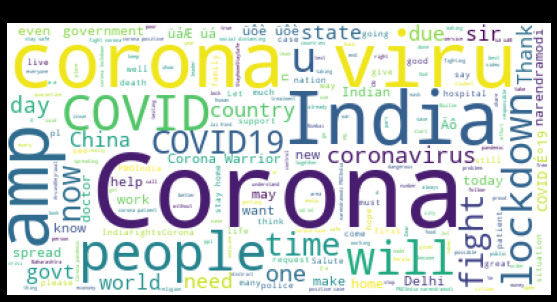

In [24]:
word_cloud(data)

# Task 2 - Which hashtag trended (Hashtags are words or phrases beginning with # eg #COVID)

In [74]:
raw = ' '.join(data) 
tags = [re.sub(r"(\W+)$", "", j,flags = re.UNICODE) for j in [i for i in raw.split() if i.startswith("#")]] #extracting tags from raw data



## wordcloud for hashtags

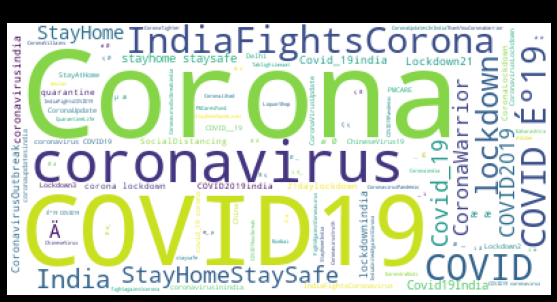

In [75]:
word_cloud(tags)

## To find number of # which are tweeted by users

In [89]:
tags[:10]

['#SSC_UFM_MAT_KARONA',
 '#Corona',
 '#UFM',
 '#cabinetmeeting',
 '#Social_Distancing',
 '#StayHome',
 '#staysafe',
 '#Corona',
 '#COVIDIOTS',
 '#corona']

In [76]:
# converting tags to dataframe using pandas so we can count each tags
hashtags = pd.DataFrame({"hashtag": tags})


In [77]:
#using value_count on dataframe and finding top 10 hashtags
print(hashtags.value_counts().head(10)) 


hashtag           
#Corona               2428
#COVID19              1684
#corona               1605
#coronavirus          1316
#IndiaFightsCorona    1075
#COVID„Éº19            955
#lockdown              885
#COVID                 697
#Covid_19              488
#StayHomeStaySafe      457
dtype: int64


In [32]:
df_hashtag = hashtags["hashtag"].value_counts().head(10)

In [78]:
df_hashtag.values

array([['#Corona', 2428],
       ['#COVID19', 1684],
       ['#corona', 1605],
       ['#coronavirus', 1316],
       ['#IndiaFightsCorona', 1075],
       ['#COVID„Éº19', 955],
       ['#lockdown', 885],
       ['#COVID', 697],
       ['#Covid_19', 488],
       ['#StayHomeStaySafe', 457]], dtype=object)

In [80]:
df_hashtag = pd.DataFrame(df_hashtag)

In [82]:
df_hashtag

,hashtag,val
0,#Corona,2428
1,#COVID19,1684
2,#corona,1605
3,#coronavirus,1316
4,#IndiaFightsCorona,1075
5,#COVID„Éº19,955
6,#lockdown,885
7,#COVID,697
8,#Covid_19,488
9,#StayHomeStaySafe,457


## bar graph for top hastags

<AxesSubplot:xlabel='hashtag'>

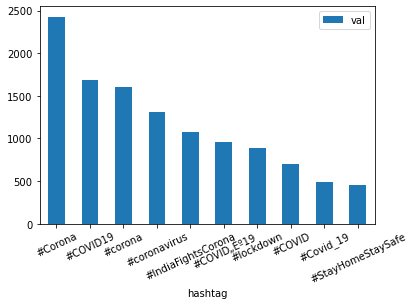

In [88]:
df_hashtag.plot.bar(x="hashtag" , y= "val", rot=25)

# Task 3 - Which Twitter Handler which dominated conversation on Twitter

In [90]:
# Extracting handlers from raw data
handlers = [re.sub(r"(\W+)$", "", j[1:]) for j in [i for i in raw.split() if i.startswith("@") and len(i) != 1 ]]

In [91]:
handler_df = pd.DataFrame({"handler": handlers})
print(handler_df)

               handler
0          DelhiPolice
1         DCPEastDelhi
2             msisodia
3        AamAadmiParty
4       ArvindKejriwal
...                ...
57007        NITIAayog
57008      FinMinIndia
57009         PMOIndia
57010          ZeeNews
57011  sudhirchaudhary

[57012 rows x 1 columns]


In [94]:
# Counting handlers by using .value_count() function from pandas 
top10_handler = handler_df['handler'].value_counts().head(10)
print(top10_handler)

narendramodi       3622
PMOIndia           2655
AmitShah            722
ArvindKejriwal      708
MoHFW_INDIA         511
myogiadityanath     504
CMOMaharashtra      470
RahulGandhi         454
aajtak              416
BJP4India           337
Name: handler, dtype: int64


## Plotting top 10 handlers using pie function of pandas

<AxesSubplot:ylabel='handler'>

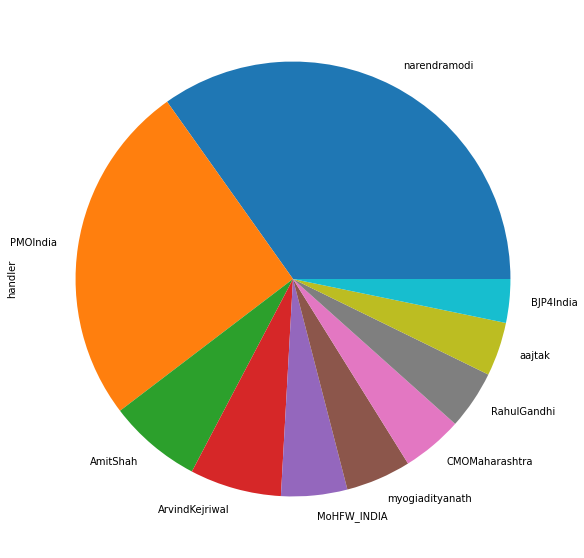

In [102]:
top10_handler.plot.pie(y="handler",figsize=(10, 10))

## saving data for future purpose

In [48]:
#with open("data.pkl","wb") as f:
    #pickle.dump(data,f)

In [49]:
#with open("raw.pkl","wb") as f:
    #pickle.dump(raw,f)

In [6]:
with open("data.pkl","rb") as f:
    data = pickle.load(f)

In [7]:
with open("raw.pkl","rb") as f:
    raw = pickle.load(f)

In [8]:
len(raw)

7558055

In [9]:
len(data)

44179